# Comparing Classifiers

Alberto Martínez Guerrero

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss = StandardScaler()

In [6]:
#We generate the new scaled dataset

In [13]:
arr = ss.fit_transform(iris.data)

In [14]:
y = iris.target

In [15]:
X = pd.DataFrame(data=arr, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
# Split the dataset

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
X_train.shape, y_train.shape

((100, 4), (100,))

In [23]:
X_test.shape, y_test.shape

((50, 4), (50,))

## 3. Build Classification Models

Modified from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [ ]:
# Import the classifiers from sklearn

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
# Create arrays for the classifiers

In [26]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Decision_Tree", 
         "Random_Forest", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),     
    DecisionTreeClassifier(max_depth=5),    
    RandomForestClassifier(max_depth=5, n_estimators=100),        
    SGDClassifier(loss="hinge", penalty="l2")]

In [27]:
# Build all the models

In [28]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

In [29]:
scores

[0.98, 0.92, 0.72, 0.98, 0.98, 0.98, 0.88]

In [ ]:
# Create a new dataframe with th scores of the models

In [30]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.98
1,Linear_SVM,0.92
2,Polynomial_SVM,0.72
3,RBF_SVM,0.98
4,Decision_Tree,0.98
5,Random_Forest,0.98
6,SGD,0.88


In [ ]:
# Create a bar plot of the score of the diferent classifiers tested

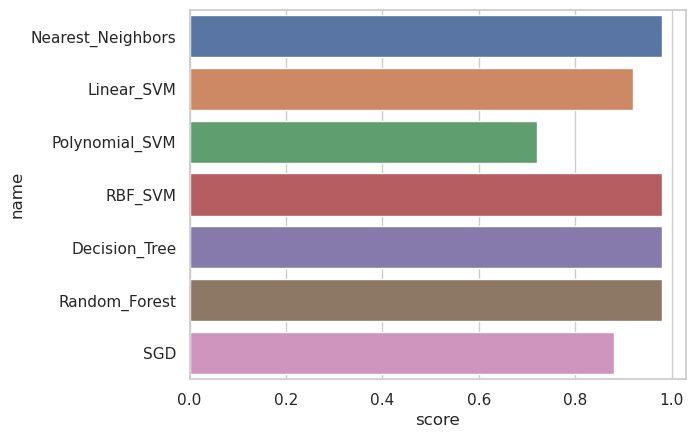

In [32]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

---